In [10]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('../data/cleaned_data.csv', low_memory=False)
X = df.drop(columns=['loan_status'],axis=1)
y = df['loan_status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=77)
df = pd.concat([X_test, y_test], axis=1)
# Create a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train the dummy classifier
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [13]:
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

In [14]:
roc_auc_dummy = roc_auc_score(y_test, y_prob_dummy)

In [15]:
roc_auc_dummy

0.5

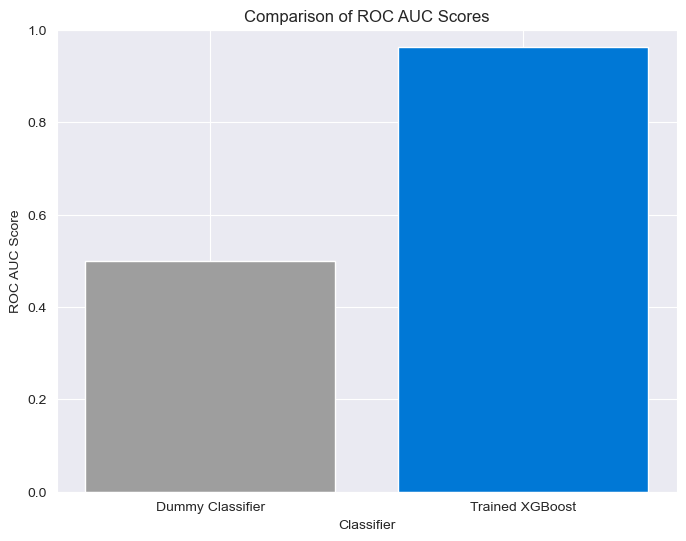

In [26]:
roc_auc_dummy = 0.5
roc_auc_clf = 0.963

# Labels for the bar plot
labels = ['Dummy Classifier', 'Trained XGBoost']

# ROC AUC scores
scores = [roc_auc_dummy, roc_auc_clf]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, scores, color=['#9e9e9e', '#0078d6'])
plt.xlabel('Classifier')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)
plt.title('Comparison of ROC AUC Scores')
plt.show()